<a href="https://colab.research.google.com/github/paulanavarretec/Fundamentos_Data_Science/blob/main/12_Regresion_desde_la_econometria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafío \#12 - Regresión desde la econometría

# Desafío 1: Prepare el ambiente de trabajo

* Importe las librerías básicas para el análisis de datos.
* Incluya los import base de statsmodels.
* Importe la base de datos Credit.csv y elimine la columna Unnamed: 0.
* Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de Ethnicity, genere binarias para African American, Caucasian y Asian.
  * tip: Utilice value_counts() para revisar la cantidad de casos en las variables
categóricas.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels as sm
import warnings
warnings.filterwarnings(action='ignore')

pd.set_option("display.precision", 2)

df = pd.read_csv('Credit.csv').drop(columns='Unnamed: 0')
df = pd.concat([df, pd.get_dummies(df.Ethnicity)], axis=1)

df.columns = df.columns.str.replace(' ', '_') # remove space character from column names
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,African_American,Asian,Caucasian
0,14.89,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0,1
1,106.03,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1,0
2,104.59,7075,514,4,71,11,Male,No,No,Asian,580,0,1,0
3,148.92,9504,681,3,36,11,Female,No,No,Asian,964,0,1,0
4,55.88,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Income            400 non-null    float64
 1   Limit             400 non-null    int64  
 2   Rating            400 non-null    int64  
 3   Cards             400 non-null    int64  
 4   Age               400 non-null    int64  
 5   Education         400 non-null    int64  
 6   Gender            400 non-null    object 
 7   Student           400 non-null    object 
 8   Married           400 non-null    object 
 9   Ethnicity         400 non-null    object 
 10  Balance           400 non-null    int64  
 11  African_American  400 non-null    uint8  
 12  Asian             400 non-null    uint8  
 13  Caucasian         400 non-null    uint8  
dtypes: float64(1), int64(6), object(4), uint8(3)
memory usage: 35.7+ KB


In [7]:
df.describe(include=[object])

,Gender,Student,Married,Ethnicity
count,400,400,400,400
unique,2,2,2,3
top,Female,No,Yes,Caucasian
freq,207,360,245,199


In [8]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance,African_American,Asian,Caucasian
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.0
mean,45.22,4735.60,354.94,2.96,55.67,13.45,520.01,0.25,0.26,0.5
std,35.24,2308.20,154.72,1.37,17.25,3.13,459.76,0.43,0.44,0.5
min,10.35,855.00,93.00,1.00,23.00,5.00,0.00,0.00,0.00,0.0
25%,21.01,3088.00,247.25,2.00,41.75,11.00,68.75,0.00,0.00,0.0
50%,33.12,4622.50,344.00,3.00,56.00,14.00,459.50,0.00,0.00,0.0
75%,57.47,5872.75,437.25,4.00,70.00,16.00,863.00,0.00,1.00,1.0
max,186.63,13913.00,982.00,9.00,98.00,20.00,1999.00,1.00,1.00,1.0


In [9]:
for var in ['Gender','Student','Married','Ethnicity']:
  print(df.value_counts(var)/len(df[var]))
  print('')

Gender
Female    0.52
 Male     0.48
dtype: float64

Student
No     0.9
Yes    0.1
dtype: float64

Married
Yes    0.61
No     0.39
dtype: float64

Ethnicity
Caucasian           0.50
Asian               0.26
African American    0.25
dtype: float64



#Desafío 2: Genere gráficos descriptivos para las variables continuas

* Genere una función llamada plot_hist que genere un histograma de la variable e
indique la media y mediana de la misma. Agregue una leyenda para indicar qué
representa cada línea.
* ¿Cuál es el comportamiento de Balance, Income, Cards y Rating?


In [10]:
def plot_hist(df, var):

  lines = [df[var].mean(),df[var].median(),df[var].mode()[0]]
  colors = ['tomato','blue', 'violet']
  legend = ['Media', 'Mediana', 'moda']

  sns.histplot(data=df, x=var, bins=30, color='lightgreen')
  for i in [0,1,2]:
    plt.axvline(lines[i], color=colors[i])
    plt.legend(legend, loc ="upper right")
  plt.show()

def test_normal_dist(df, var):
  stat, p = stats.shapiro(df[var])
  print('Statistic=%.3f, p=%.3f' % (stat, p))
  # interpret
  alpha = 0.05
  if p > alpha:
    print('La muestra de {} Parece Gaussiana (no se rechaza H0)'.format(var))
  else:
    print('La muestra {} NO Parece Gaussiana (se rechaza H0)'.format(var))

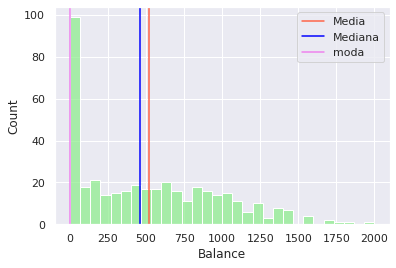

Statistic=0.917, p=0.000
La muestra Balance NO Parece Gaussiana (se rechaza H0)



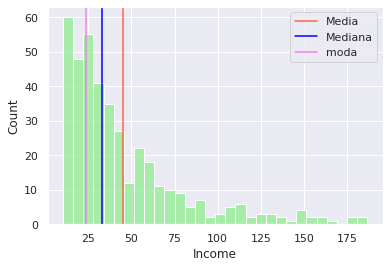

Statistic=0.810, p=0.000
La muestra Income NO Parece Gaussiana (se rechaza H0)



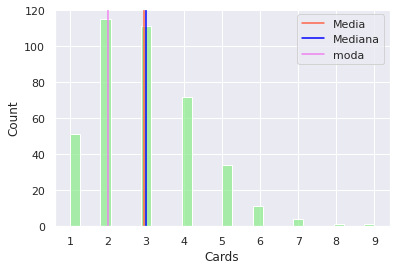

Statistic=0.915, p=0.000
La muestra Cards NO Parece Gaussiana (se rechaza H0)



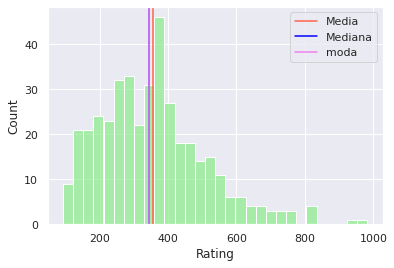

Statistic=0.954, p=0.000
La muestra Rating NO Parece Gaussiana (se rechaza H0)



In [11]:
vars = [ 'Balance', 'Income', 'Cards', 'Rating']
for var in vars:
  plot_hist(df, var)
  test_normal_dist(df, var)
  print('')

Podemos ver de los histogramas que ninguna a simple vista demuestra el comportamiento clásico de una distribución normal. Podemos ver que las curvas no se centran en torno a un mismo punto, que en caso de que distribuyeran Normal, correspondería al mismo valor para la media, mediana y moda. 
Al administrar el test de Shapiro-Wilk, que asume que la muestra se extrajo de una distribución gaussiana (hipótesis nula o H0). Esto significa que, en general, buscamos resultados con un valor p mayor para confirmar que nuestra muestra probablemente se extrajo de una distribución gaussiana. Para el caso de todas las variables mencionadas, ninguna pasó el test de normalidad. 

# Desafío 3: Regresión Lineal Simple

* A continuación generaremos una serie de modelos simples: 

  * $𝐵𝑎𝑙𝑎𝑛𝑐𝑒 = \beta_0 + \beta_1 * Student + \epsilon$ 
  * $𝐵𝑎𝑙𝑎𝑛𝑐𝑒 = \beta_0 + \beta_1 * Income + \epsilon$ 
  * $𝐵𝑎𝑙𝑎𝑛𝑐𝑒 = \beta_0 + \beta_1 * Rating + \epsilon$ 
* Utilizando statsmodels, comente brevemente los siguientes puntos:
  * ¿Qué variable presenta un mayor poder explicativo de la variabilidad de
Balance?
  * ¿Qué podemos decir sobre el comportamiento de Student?
    * ¿Qué pasa si aplicamos una prueba de hipotesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?

In [12]:
for predictor in ['Student', 'Income', 'Rating']:
  model = smf.ols( 'Balance ~ '+predictor , data = df).fit()
  print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           1.49e-07
Time:                        02:21:26   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.

|                    | Student     | Income      | Rating       |
| ------------------ | ----------- | ----------- | ------------ |
| Adj. R-squared     | 0.065       | 0.213       | 0.745        |
| Prob (F-statistic) | 1.49e-07    | 1.03e-22    | 1.90e-120    |
| AIC                | 6015        | 5946        | 5495         |
| BIC                | 6023        | 5954        | 5503         |

La variable Rating es aquella que presenta un mayor poder explicativo de la variabilidad de Balance ya que el $R^2$ ajustado del modelo que lo utiliza es sustancialmente mayor que para las otras dos variables (74,5% vs 6,5% y 21,3% para Student e Income respectivamente). Aparte, tanto AIC como BIC del modelo que utiliza la variable rating son  menores que para las otras dos.

In [13]:
print('Ho: El balance es similar entre los individuos que estudian y aquellos que no.')
stat , p = stats.ttest_ind(df.query("Student == 'Yes'")['Balance'] , 
                df.query("Student == 'No'")['Balance'])
print('Statistic=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print('Las muestras Parecen similares (no se rechaza H0)')
else:
  print('Las muestras NO Parecen similares (se rechaza H0)')

print('Media de los individuos que SI estudian {}'.format(round(df.query("Student == 'Yes'")['Balance'].mean(),1)))
print('Media de los individuos que NO estudian {}'.format(round(df.query("Student == 'No'")['Balance'].mean(),1)))

Ho: El balance es similar entre los individuos que estudian y aquellos que no.
Statistic=5.350, p=0.000
Las muestras NO Parecen similares (se rechaza H0)
Media de los individuos que SI estudian 876.8
Media de los individuos que NO estudian 480.4


La evidencia entregada por ttest_ind sugiere que la diferencia en el balance entre ambos grupos es significativa al 99%. En promedio el balance para los individuos que si estudian es de  876,8 mientras que para aquellos que no es de 480,4. En promedio esperamos que los  individuos que estudian presenten mayores balances que aquellos que no.

# Desafío 4: Generar un modelo que incluya todos los regresores

$Balance_i = \beta_0 + \sum_{j=1}^{N} \beta_j * X_{ij} + \epsilon_i$

* Comente brevemente sobre el poder explicativo en la varianza de 𝑦 y las principales características de los predictores.

In [14]:
cols = list(df.columns)
cols.remove('Balance', )
cols.remove('Ethnicity')
cols.remove('Caucasian')
#cols.remove('African_American')
#cols.remove('Asian')

predictor = ''
for column in cols:
  predictor += '+'+column

model = smf.ols( 'Balance ~ '+predictor[1:] , data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          1.11e-253
Time:                        02:21:27   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -469.1008     34.709  

El modelo explica en total un 95,4% de la variabilidad del Balance, lo cual indica que tiene un alto ajuste y poder predictivo. De todas las variables incorporadas al modelo, las únicas que son significativas son el Intercepto, Student, Income, Limit, Rating, Cards y Age al 95%

# Desafío 5: Depure el modelo e incluya sólo los predictores significativo

* En base al modelo anterior, refactoriza e incluya sólo las variables con un nivel de significancia 𝑝 − 𝑣𝑎𝑙𝑢𝑒 ≤. 025. Comente brevemente sobre el poder explicativo en la varianza de 𝑦 y las principales características de los predictores.
* ¿Mejoró o empeoró el modelo con la reducción de regresores?

In [15]:
predictor = 'Student+ Income+ Limit+ Rating+ Cards'
model = smf.ols( 'Balance ~ '+predictor , data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1640.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          3.60e-261
Time:                        02:21:27   Log-Likelihood:                -2402.8
No. Observations:                 400   AIC:                             4818.
Df Residuals:                     394   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -526.1555     19.747    -26.

|                    | all predictors | Some Predictors      |
| ------------------ | ----------- | ----------- | 
| Adj. R-squared     | 0.954       | 0.954       | 
| Prob (F-statistic) | 1.11e-253   | 3.60e-261   | 
| AIC                | 4821        | 4818        |
| BIC                | 4869        | 4842        |

Tras la reducción de regresores vemos que el modelo ha mejorado, ya que si bien presentan el mismo $R^2$, la Prob (F-statistic) ha aumentado y tanto AIC y BIC han disminuido respecto del modelo que utiliza todos los predictores. 

# Desafío 6
* Utilizando lmplot de seaborn, inspeccione el comportamiento de los tres
principales determinantes.

priorizar variables continuas en la seleccion de los principales determinantes

Las tres variables cuyo estadístico t fue el mayor en terminos absolutos son 'Student', 'Income' y 'Limit'. Por la naturaleza discreta de la variable 'Student', en la selección de variables priorizé rating por sobre ésta.

Podemos ver que todas las variables se relacionan de forma directamente proporcional con Balance, es decir, en la medida que aumenta una, la otra tambien lo hace. Limit y Rating se ajuntan d emejor manera (con menor dispersión) a la recta predictiva que en el caso de Income, donde vemos una mayor dispersión y menor ajuste a la forma lineal del modelo predictivo.

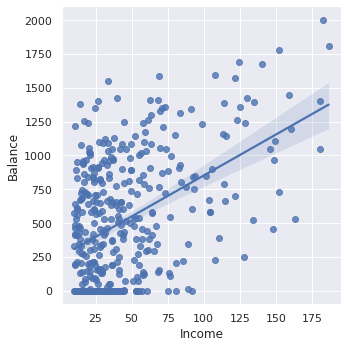

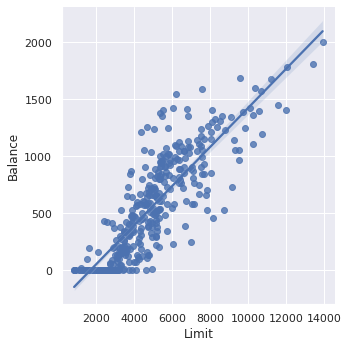

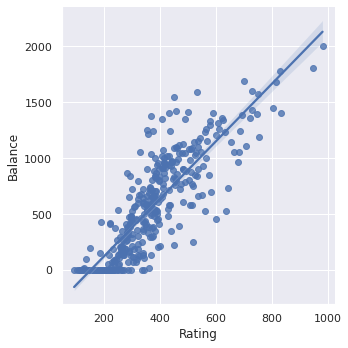

In [18]:
import seaborn as sns; sns.set_theme(color_codes=True)

for predictor in ['Income', 'Limit', 'Rating']:
  g = sns.lmplot(x=predictor, y='Balance', data=df)